      SubEDINScore  SubSTAIScore  Suicidality  CMAE04a1a  CMAE04a1b  \
0                1             1            1        0.0        0.0   
1                0             1            0        1.0        0.0   
2                0             0            0        0.0        0.0   
3                0             0            0        0.0        0.0   
4                0             1            0        0.0        0.0   
...            ...           ...          ...        ...        ...   
7785             1             1            1        1.0        1.0   
7786             0             0            0        1.0        0.0   
7787             0             0            0        0.0        0.0   
7788             0             1            0        0.0        0.0   
7789             0             1            0        0.0        0.0   

      CMAE04a1c  CMAE04a2a  CMAE04a2b  CMAE04a2c  ADHD  OCD  panic disorder  
0           0.0        0.0        0.0        0.0     0    0          

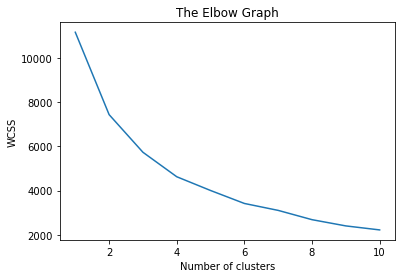

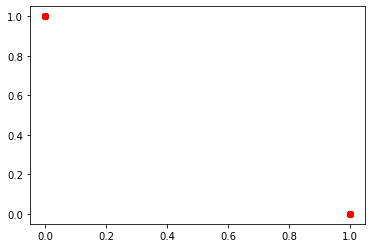

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [50]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

csv = Path("kmeans").with_name('Markers.CSV')
df = pd.read_csv(csv)

x = df
x.drop(columns=["PublicID"], inplace=True)  #dropping non int columns
x.drop(columns=["Unnamed: 0"], inplace=True)
x = x.fillna(0) # Have to double check this

print(x)
wcss = [] #sum of square


from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
x_onehot = enc.fit_transform(x).toarray()

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(x_onehot)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.scatter(x_onehot[:, 0], x_onehot[:, 1], c='red')
plt.show()

plt.scatter(x_onehot['x'], x['y'], c=data['binary_variable'])

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Binary Medical Data')

# Show the plot
plt.show()
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(x)
# #     labels=kmeans.labels_
# #     centroids = kmeans.cluster_centers_

#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1,11),wcss)
# plt.title('The Elbow Graph')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()


# kmeans = KMeans(n_clusters=8, init ='k-means++', random_state=1234)
# y_kmeans = kmeans.fit_predict(x)
# plt.figure(figsize=(10,10))

# plt.scatter(x[:, 0], x[:, 0], c='red')
# plt.scatter(x[:, 1], x[:, 1], c='blue')
# plt.scatter(x[:, 2], x[:, 2], c='green')
# plt.scatter(x[:, 3], x[:, 3], c='magenta')

# plt.show()

# bins = np.linspace(x.min(), x.max(), 101) # 100 equally-sized intervals
# plt.xticks(bins, rotation=90)
# plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
# plt.scatter(x[y_kmeans==5, 0], x[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
# plt.scatter(x[y_kmeans==6, 0], x[y_kmeans==6, 1], s=100, c='olive', label ='Cluster 7')
# plt.scatter(x[y_kmeans==7, 0], x[y_kmeans==7, 1], s=100, c='brown', label ='Cluster 8')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
# plt.title('Clusters ')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# pca = PCA()   
# pca.fit(x)
# print("\n", pca.explained_variance_ratio_ ,"\n")

# plt.figure(figsize=(10,8))
# plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
# plt.title('Explained Variance by Componenets')
# plt.xlabel("Num Componenents")
# plt.ylabel('Cumulative Explained Variance')
# plt.show()

# #I picked 7 cause it was about above 80%, I think that is correct method
# pca = PCA(n_components=7)
# pca.fit(x)
# scoresPCA = pca.transform(x)

# wcss = [] #sum of square
# for i in range(5,10):
#     kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans_pca.fit(scoresPCA)
#     wcss.append(kmeans_pca.inertia_)

# plt.figure(figsize=(10,8))
# plt.plot(range(5,10), wcss, marker = 'o', linestyle = '--')
# plt.title('optimal clusters')
# plt.xlabel("Num Clusters")
# plt.ylabel('wcss')
# plt.show()

# #Optinum clusters via plotting looks to be 8 
# """
# kmeans_pca = KMeans(n_clusters = 8, init = 'k-means++', random_state=42)
# kmeans_pca.fit(scoresPCA)
# dfkmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(scoresPCA)], axis=1)
# dfkmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# dfkmeans['Segment K-means'] = kmeans_pca.labels_
# print(dfkmeans.head())
# """

In [51]:
# Select the symptom variables and diagnosis columns
X = x[['Suicidality', 'CMAE04a1a', 'CMAE04a1b', 'CMAE04a1c', 'CMAE04a2a', 'CMAE04a2b', 'CMAE04a2c', 'ADHD', 'OCD', 'panic disorder']]

# Instantiate the k-means model
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_


ValueError: x and y must be the same size

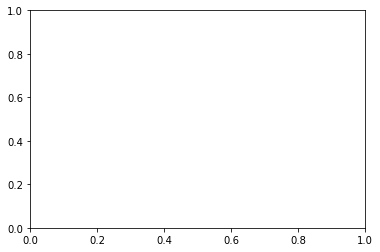

In [52]:
y = x[['Suicidality', 'CMAE04a1a', 'CMAE04a1b', 'CMAE04a1c', 'CMAE04a2a', 'CMAE04a2b', 'CMAE04a2c', 'ADHD', 'OCD', 'panic disorder']]

x = [0,1]

# Create the scatter plot
plt.scatter(x, y, c=labels)

# Add labels and a title
plt.xlabel('Diagnosis')
plt.ylabel('Symptoms')
plt.title('Scatter Plot of k-means Clusters')

# Show the plot
plt.show()